# Wrangle Business Data

In [1]:
import numpy as np
import pandas as pd
import datetime
import json

In [2]:
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [3]:
TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text.lower()))

## Load the Data

In [4]:
data = pd.DataFrame()
source_data_file = '../source_data/business.json'

biz_list = []
for line in open(source_data_file, 'r'):
    biz_list.append(json.loads(line))

time_marker(text='creating dataframe...')
data = pd.DataFrame(biz_list)

time_marker(text='set index to business_id...')
data.set_index('business_id', inplace=True, drop=True)

[22:46:06.728123] creating dataframe...
[22:46:07.932132] set index to business_id...


In [5]:
data.head()

,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
business_id,,,,,,,,,,,,,,
FYWN1wneV18bWNgQjJ2GNg,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...","[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
He-G7vWjzVUysIKrfNbPUQ,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...","[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
KQPW8lFf1y5BT2MxiSZ3QA,"6025 N 27th Ave, Ste 1",{},"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
8DShNS-LuFqpEWIp0HxijA,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...","[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
PfOCPjBrlQAnz__NXj9h_w,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...","[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174567 entries, FYWN1wneV18bWNgQjJ2GNg to viKaP26BcHU6cLx8sf4gKg
Data columns (total 14 columns):
address         174567 non-null object
attributes      174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.0+ MB


## Drop Non Arizona Locations

In [7]:
data = data[data.state == 'AZ'].copy()

## Drop 'Closed' Locations

In [8]:
# data = data[data.is_open == 1].copy()

## Parse `categories` column and keep only restaurants

In [9]:
data = data[data.categories.apply(lambda x: 'Restaurants' in x)].copy()

## Drop `attributes` column

In [10]:
data = data.drop(['attributes', 'latitude', 'longitude'], axis=1)

## Unpack Business Hours

In [11]:
time_marker(text='collecting business Hours...')
hours = data[['hours']].copy()

time_marker('splitting hours into individual columns...')
hours = pd.concat([hours.drop(['hours'], axis=1), hours['hours'].apply(pd.Series)], axis=1)

time_marker(text='Split hours into open and close...')
# split daily hours columns into '{DAY}_open' and '{DAY}_close'
for col in hours.columns:

    # split hours column of [11:00-19:00] into '{original_name}_open' and '{original_name}_close' columns
    hours['{}_open'.format(col.lower())]  = pd.to_datetime(hours[col].str.split('-', 1).str[0], format='%H:%M').dt.time
    hours['{}_close'.format(col.lower())] = pd.to_datetime(hours[col].str.split('-', 1).str[1], format='%H:%M').dt.time

    # drop original day columns
    hours.drop(col, axis=1, inplace=True)

time_marker('sorting day columns order...')
cols = [['{}_open'.format(x.lower()), '{}_close'.format(x.lower())] for x in day_labels]
ordered_cols = list()
for day in cols:
    for time in day:
        ordered_cols.append(time)

hours = hours[ordered_cols].copy()

# fill nan
hours = hours.replace(np.nan, '00:00:00', regex=True)

# merge back to original data frame
time_marker(text='merge open and close hours to business data...')
data = data.merge(hours, left_index=True, right_index=True)

data.drop(['hours'], axis=1, inplace=True)

[22:46:08.744739] collecting business hours...
[22:46:08.748321] splitting hours into individual columns...
[22:46:13.985388] split hours into open and close...
[22:46:15.911678] sorting day columns order...
[22:46:15.945048] merge open and close hours to business data...


## Lowercase and Sanitize Categories Lists

In [12]:
data['categories'] = data.categories.apply(lambda x: [c.lower().replace(' ','_') for c in x])

## Cleanup columns and reset index

In [13]:
time_marker(text='cleaning up and reset index...')
data.columns = [str(x).lower().replace(' ', '_') for x in data.columns]
data.reset_index(inplace=True)

[22:46:16.071491] cleaning up and reset index...


In [14]:
data.head()

,business_id,address,categories,city,is_open,name,neighborhood,postal_code,review_count,stars,...,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,sunday_open,sunday_close
0,rDMptJYWtnMhpQu_rRXHng,719 E Thunderbird Rd,"[fast_food, burgers, restaurants]",Phoenix,1,McDonald's,,85022,10,1.0,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
1,1WBkAuQg81kokZIPMpn9Zg,"777 E Thunderbird Rd, Ste 107","[burgers, restaurants]",Phoenix,1,Charr An American Burger Bar,,85022,232,3.0,...,11:00:00,22:00:00,11:00:00,22:00:00,11:00:00,23:00:00,11:00:00,23:00:00,11:00:00,21:00:00
2,iPa__LOhse-hobC2Xmp-Kw,1635 E Camelback Rd,"[restaurants, burgers, fast_food]",Phoenix,1,McDonald's,,85016,34,3.0,...,05:00:00,23:00:00,05:00:00,23:00:00,05:00:00,23:00:00,05:00:00,23:00:00,05:00:00,23:00:00
3,kKx8iCJkomVQBdWHnmmOiA,10720 E Southern Ave,"[restaurants, pizza]",Mesa,1,Little Caesars Pizza,,85209,4,2.5,...,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
4,YhV93k9uiMdr3FlV4FHjwA,,"[marketing, men's_clothing, restaurants, graph...",Phoenix,1,Caviness Studio,,85001,4,5.0,...,08:00:00,17:00:00,08:00:00,17:00:00,08:00:00,17:00:00,09:00:00,15:00:00,00:00:00,00:00:00


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10598 entries, 0 to 10597
Data columns (total 25 columns):
business_id        10598 non-null object
address            10598 non-null object
categories         10598 non-null object
city               10598 non-null object
is_open            10598 non-null int64
name               10598 non-null object
neighborhood       10598 non-null object
postal_code        10598 non-null object
review_count       10598 non-null int64
stars              10598 non-null float64
state              10598 non-null object
monday_open        10598 non-null object
monday_close       10598 non-null object
tuesday_open       10598 non-null object
tuesday_close      10598 non-null object
wednesday_open     10598 non-null object
wednesday_close    10598 non-null object
thursday_open      10598 non-null object
thursday_close     10598 non-null object
friday_open        10598 non-null object
friday_close       10598 non-null object
saturday_open      10598 non-nu

In [16]:
data.head().transpose()

,0,1,2,3,4
business_id,rDMptJYWtnMhpQu_rRXHng,1WBkAuQg81kokZIPMpn9Zg,iPa__LOhse-hobC2Xmp-Kw,kKx8iCJkomVQBdWHnmmOiA,YhV93k9uiMdr3FlV4FHjwA
address,719 E Thunderbird Rd,"777 E Thunderbird Rd, Ste 107",1635 E Camelback Rd,10720 E Southern Ave,
categories,"[fast_food, burgers, restaurants]","[burgers, restaurants]","[restaurants, burgers, fast_food]","[restaurants, pizza]","[marketing, men's_clothing, restaurants, graph..."
city,Phoenix,Phoenix,Phoenix,Mesa,Phoenix
is_open,1,1,1,1,1
name,McDonald's,Charr An American Burger Bar,McDonald's,Little Caesars Pizza,Caviness Studio
neighborhood,,,,,
postal_code,85022,85022,85016,85209,85001
review_count,10,232,34,4,4
stars,1,3,3,2.5,5


In [17]:
# data.neighborhood.unique()
# data.state.unique()

## Unique categories

In [18]:
import itertools

In [19]:
all_categories = list(itertools.chain.from_iterable(data.categories.values))

categories = {}

for item in all_categories:
    if item not in categories.keys():
        categories[item] = 1
    else:
        categories[item] += 1
del categories['restaurants']
del categories['food']

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.DataFrame.from_dict(categories, orient='index')
df.columns = ['counts']
df.sort_values('counts', inplace=True, ascending=False)

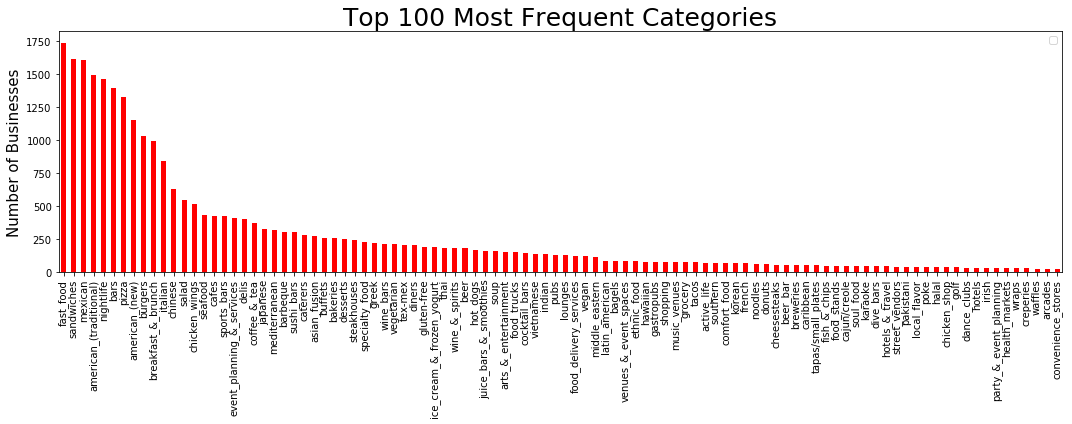

In [22]:
ax = df[:100].plot(kind='bar',figsize=(15,6), color='r')
ax.set_title('Top 100 Most Frequent Categories', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/top_100_restaurant_categories_pass0.png')
plt.show()
plt.close()

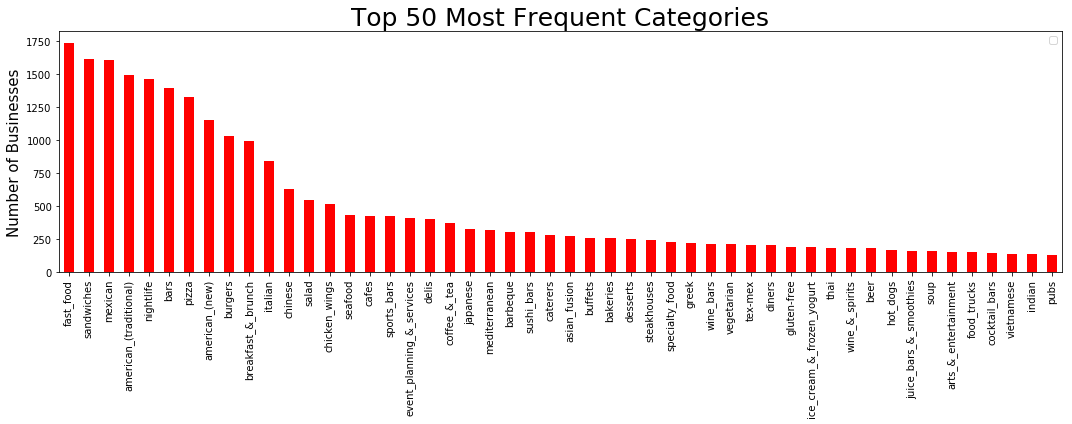

In [23]:
ax = df[:50].plot(kind='bar',figsize=(15,6), color='r')
ax.set_title('Top 50 Most Frequent Categories', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/top_50_restaurant_categories_pass1.png')
plt.show()
plt.close()

## Cleanup Categories we might not want
<p>Refilter restaurants to only be restaurants with both 'Restaurants' and at least one of the top 50 categories</p>
<p>There are some categories we dont want in the top 50, remove businesses with any of these categories</p>

In [24]:
top_50_categories = [x for x in df[:50].index.values]
print(top_50_categories)

['fast_food', 'sandwiches', 'mexican', 'american_(traditional)', 'nightlife', 'bars', 'pizza', 'american_(new)', 'burgers', 'breakfast_&_brunch', 'italian', 'chinese', 'salad', 'chicken_wings', 'seafood', 'cafes', 'sports_bars', 'event_planning_&_services', 'delis', 'coffee_&_tea', 'japanese', 'mediterranean', 'barbeque', 'sushi_bars', 'caterers', 'asian_fusion', 'buffets', 'bakeries', 'desserts', 'steakhouses', 'specialty_food', 'greek', 'wine_bars', 'vegetarian', 'tex-mex', 'diners', 'gluten-free', 'ice_cream_&_frozen_yogurt', 'thai', 'wine_&_spirits', 'beer', 'hot_dogs', 'juice_bars_&_smoothies', 'soup', 'arts_&_entertainment', 'food_trucks', 'cocktail_bars', 'vietnamese', 'indian', 'pubs']


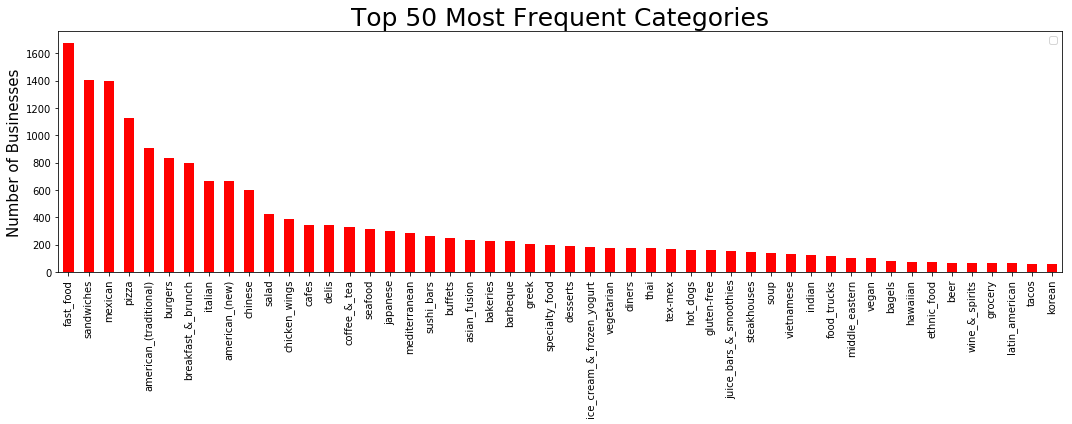

In [25]:
categories_to_ignore = ['nightlife', 'event_planning_&_services', 'caterers', 'arts_&_entertainment', 'food_delivery_services']

data_pass2 = data.copy()
for cat in categories_to_ignore:
    data_pass2 = data_pass2[data_pass2.categories.apply(lambda x: cat not in x)].copy()

all_categories = list(itertools.chain.from_iterable(data_pass2.categories.values))

categories = {}

for item in all_categories:
    if item not in categories.keys():
        categories[item] = 1
    else:
        categories[item] += 1
del categories['restaurants']
del categories['food']

df = pd.DataFrame.from_dict(categories, orient='index')
df.columns = ['counts']
df.sort_values('counts', inplace=True, ascending=False)

ax = df[:50].plot(kind='bar',figsize=(15,6), color='r')
ax.set_title('Top 50 Most Frequent Categories', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/top_50_restaurant_categories_pass2.png')
plt.show()
plt.close()

## One Last Pass to clean up Categories of special characters

In [26]:
data_pass2['categories'] = data_pass2.categories.apply(lambda x: [c.replace('(','').replace(')','').replace('&','').replace('-','_').replace('/','_').replace('\'','').replace('__','_') for c in x])
data_pass2.drop(['state', 'neighborhood'], axis=1, inplace=True)

## A Third Pass
<p>We are very close, but lets toss out businesses with 'grocery' as a category</p>

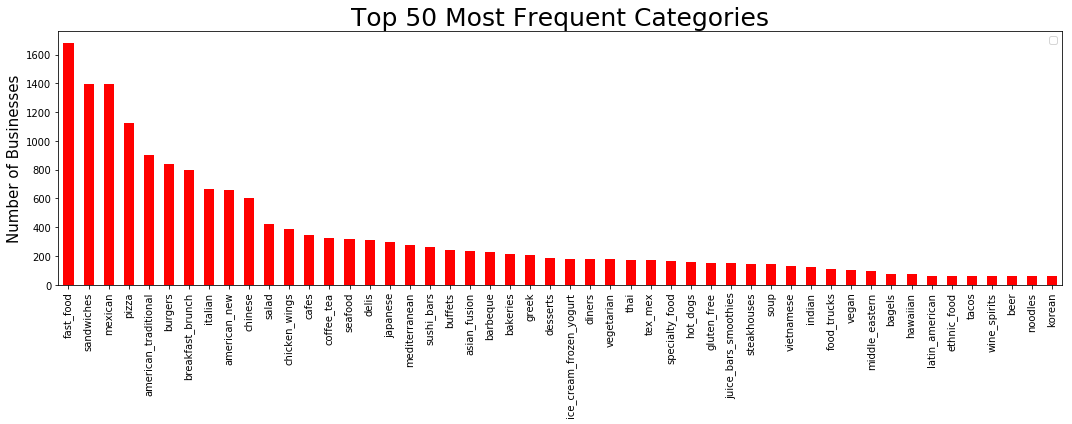

In [27]:
categories_to_ignore = ['grocery']

data_pass3 = data_pass2.copy()
for cat in categories_to_ignore:
    data_pass3 = data_pass3[data_pass3.categories.apply(lambda x: cat not in x)].copy()

all_categories = list(itertools.chain.from_iterable(data_pass3.categories.values))

categories = {}

for item in all_categories:
    if item not in categories.keys():
        categories[item] = 1
    else:
        categories[item] += 1
del categories['restaurants']
del categories['food']

df = pd.DataFrame.from_dict(categories, orient='index')
df.columns = ['counts']
df.sort_values('counts', inplace=True, ascending=False)

ax = df[:50].plot(kind='bar',figsize=(15,6), color='r')
ax.set_title('Top 50 Most Frequent Categories', size=TITLE_FONT_SIZE)
ax.set_ylabel('Number of Businesses', size=LABEL_FONT_SIZE)
ax.legend('')
plt.tight_layout()
plt.savefig('../charts/top_50_restaurant_categories_pass3.png')
plt.show()
plt.close()

In [28]:
data_pass3.reset_index(inplace=True, drop=True)
data_pass3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 23 columns):
business_id        8603 non-null object
address            8603 non-null object
categories         8603 non-null object
city               8603 non-null object
is_open            8603 non-null int64
name               8603 non-null object
postal_code        8603 non-null object
review_count       8603 non-null int64
stars              8603 non-null float64
monday_open        8603 non-null object
monday_close       8603 non-null object
tuesday_open       8603 non-null object
tuesday_close      8603 non-null object
wednesday_open     8603 non-null object
wednesday_close    8603 non-null object
thursday_open      8603 non-null object
thursday_close     8603 non-null object
friday_open        8603 non-null object
friday_close       8603 non-null object
saturday_open      8603 non-null object
saturday_close     8603 non-null object
sunday_open        8603 non-null object
sunday_close  

In [29]:
data_pass3[120:125].transpose()

,120,121,122,123,124
business_id,Xgz_NU2-wZWxQWXUFI4T2w,IJrRJLKS7qxzzVUkh1U5iA,ySRaNkXgv0jmuT4HhmgSog,LcYrqMhUO_TITSXFk_SjJA,iGvnkEz2efD9q-Z7ZcasWQ
address,478 N Arizona Ave,5630 W Camelback Rd,"521 S College Ave, Ste 110","21001 North Tatum Blvd., #93",2836 E Indian School Rd
categories,"[restaurants, chicken_wings, burgers, barbeque]","[restaurants, mexican]","[pizza, salad, chicken_wings, restaurants]","[soup, restaurants, buffets, vegetarian, salad]","[pizza, italian, restaurants]"
city,Chandler,Glendale,Tempe,Phoenix,Phoenix
is_open,0,0,0,1,1
name,BEAT E's Ribs & More,Tio Freddys Mexican Food-Jalapenos,WisePies Pizza & Salad,Sweet Tomatoes,Papa John's Pizza
postal_code,85225,85301,85281,85050,85016
review_count,3,3,14,115,8
stars,5,4.5,4,3.5,1.5
monday_open,10:30:00,00:00:00,11:00:00,11:00:00,00:00:00


# Write to File

In [30]:
file_name = '../clean_data/business_clean.csv'
time_marker(text='Writing {:d} records to file {}'.format(data_pass3.shape[0], file_name))
data_pass3.to_csv(file_name, encoding='utf-8')

[22:46:23.013917] writing 8603 records to file ../clean_data/business_clean.csv
